Choose data source:
1. Use sample generated data
2. Upload your own CSV file
Enter 1 or 2: 2


Saving sample_classification_data.csv to sample_classification_data (1).csv

Uploaded Data (first 5 rows):
   Feature1  Feature2  Target
0  0.496714  1.715575       0
1 -0.138264  2.121569       0
2  0.647689  3.166102       0
3  1.523030  3.107604       0
4 -0.234153 -1.755339       1

Available columns: ['Feature1', 'Feature2', 'Target']

Enter the target column name for classification: Feature1

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         9
           0       0.72      1.00      0.83        43
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1

    accuracy                           0.72        60
   macro avg       0.18      0.25      0.21        60
weighted avg       0.51      0.72      0.60        60


Confusion Matrix:
[[ 0  9  0  0]
 [ 0 43  0  0]
 [ 0  7  0  0]
 [ 0  1  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


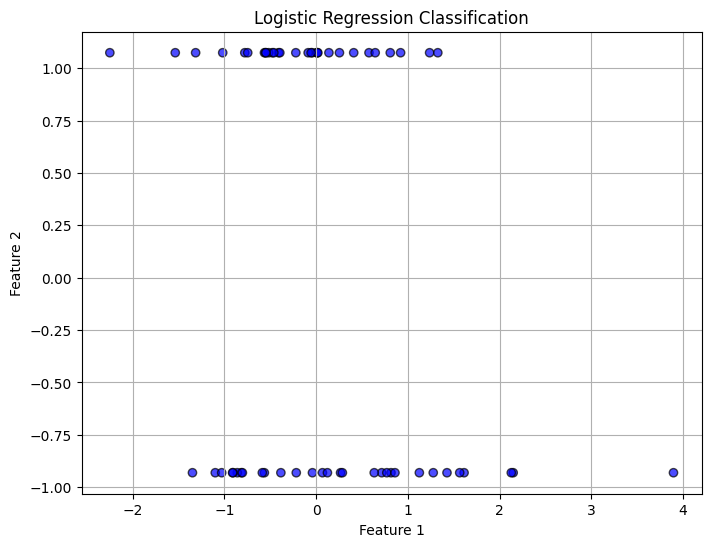

In [6]:
# Install required packages (optional in Colab)
# !pip install scikit-learn pandas matplotlib

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from google.colab import files

# Step 2: Choose data source
print("Choose data source:")
print("1. Use sample generated data")
print("2. Upload your own CSV file")
choice = input("Enter 1 or 2: ")

if choice == '2':
    # Upload CSV
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)

    print("\nUploaded Data (first 5 rows):")
    print(df.head())

    # Select numeric columns
    numeric_df = df.select_dtypes(include=np.number)
    print(f"\nAvailable columns: {list(numeric_df.columns)}")

    target_col = input("\nEnter the target column name for classification: ")

    X = numeric_df.drop(columns=[target_col]).dropna()
    y = numeric_df[target_col].dropna()
else:
    # Generate synthetic classification data
    X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                               n_informative=2, n_clusters_per_class=1,
                               random_state=42)
    X = pd.DataFrame(X, columns=["Feature1", "Feature2"])

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Logistic Regression
# Convert target to integer (discrete classes)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Visualization (only if 2 features)
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='bwr', alpha=0.7, edgecolor='k')
    plt.title("Logistic Regression Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()
else:
    print("\nVisualization skipped (requires exactly 2 features).")